# Unsupervised Learning: Trade&Ahead

**Marks: 60**

## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist

# To perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# To compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
# Importing and loading the data
data = pd.read_csv("stock_data.csv")

<IPython.core.display.Javascript object>

In [3]:
# Displaying the first five rows
data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


<IPython.core.display.Javascript object>

In [4]:
# Checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

<IPython.core.display.Javascript object>

- 4 variables of  dataypes object.
- 7 variables of datatypes float.
- 4 variables of datatypes int.

In [5]:
# Checking shape of the data
data.shape

(340, 15)

<IPython.core.display.Javascript object>

- 340 rows and 15 columns.

In [6]:
# Checking for null values
data.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

<IPython.core.display.Javascript object>

- No null values

In [7]:
# let's check for duplicated values
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- No duplicate values.

In [8]:
round(data.describe(include="all"), 2)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
count,340,340,340,340,340.00,340.00,340.00,340.00,340.00,3.400000e+02,3.400000e+02,340.00,3.400000e+02,340.00,340.00
unique,340,340,11,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,AAL,American Airlines Group,Industrials,Oil & Gas Exploration & Production,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,53,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,80.86,4.08,1.53,39.60,70.02,5.553762e+07,1.494385e+09,2.78,5.770283e+08,32.61,-1.72
std,NaN,NaN,NaN,NaN,98.06,12.01,0.59,96.55,90.42,1.946365e+09,3.940150e+09,6.59,8.458496e+08,44.35,13.97
min,NaN,NaN,NaN,NaN,4.50,-47.13,0.73,1.00,0.00,-1.120800e+10,-2.352800e+10,-61.20,2.767216e+07,2.94,-76.12
25%,NaN,NaN,NaN,NaN,38.55,-0.94,1.13,9.75,18.00,-1.939065e+08,3.523012e+08,1.56,1.588482e+08,15.04,-4.35
50%,NaN,NaN,NaN,NaN,59.70,4.82,1.39,15.00,47.00,2.098000e+06,7.073360e+08,2.90,3.096751e+08,20.82,-1.07
75%,NaN,NaN,NaN,NaN,92.88,10.70,1.70,27.00,99.00,1.698108e+08,1.899000e+09,4.62,5.731175e+08,31.76,3.92


<IPython.core.display.Javascript object>

- The average current stock price is 80.86 dollars for a maximum price of 1274.95 dollars and a minimum of 4.50 dollars.
- The average earning per share is 2.78 dollars for a minimum of -61.20 dollars. However, three quarters of the shares have an earning per share of 4 dollars.

In [9]:
data.nunique()

Ticker Symbol                   340
Security                        340
GICS Sector                      11
GICS Sub Industry               104
Current Price                   336
Price Change                    340
Volatility                      340
ROE                              82
Cash Ratio                      124
Net Cash Flow                   332
Net Income                      335
Earnings Per Share              268
Estimated Shares Outstanding    323
P/E Ratio                       295
P/B Ratio                       299
dtype: int64

<IPython.core.display.Javascript object>

- Ticker Symbol, security , Price change and Volatility are unique records.

In [10]:
# Making copy of the dataframe
df = data.copy()

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Univariate Analysis

#### Numeric Variables

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histo_box(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [12]:
# We could use the for loop code below to generate the plots but we need to make comments for each plot
# reason why we separate them out.
# num_col = df.select_dtypes(include=np.number).columns
# for feature in num_col:
#     histo_box(
#         df, feature, figsize=(12, 7), kde=False, bins=None
#     )

<IPython.core.display.Javascript object>

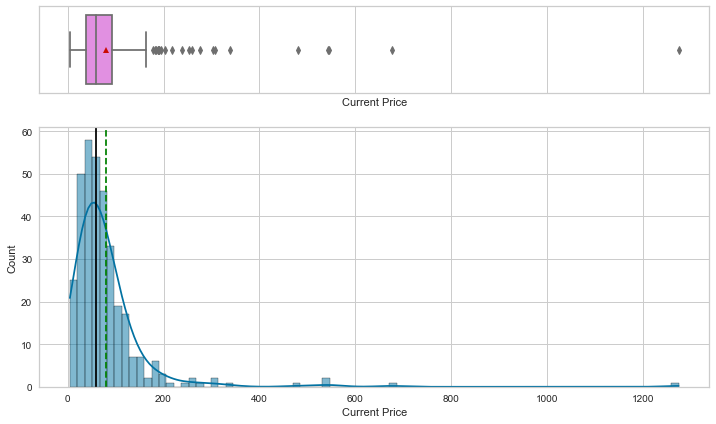

<IPython.core.display.Javascript object>

In [13]:
histo_box(df, "Current Price", kde=True)

- Current Price is right skewed.
- This indicates the presence of outliers that produces a long tail.

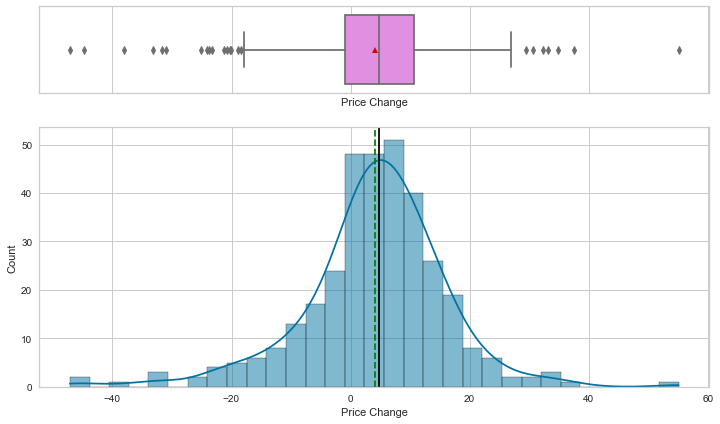

<IPython.core.display.Javascript object>

In [14]:
histo_box(df, "Price Change", kde=True)

- Price change is normally distributed.
- Oultiers on both sides of the tail can be noticed.

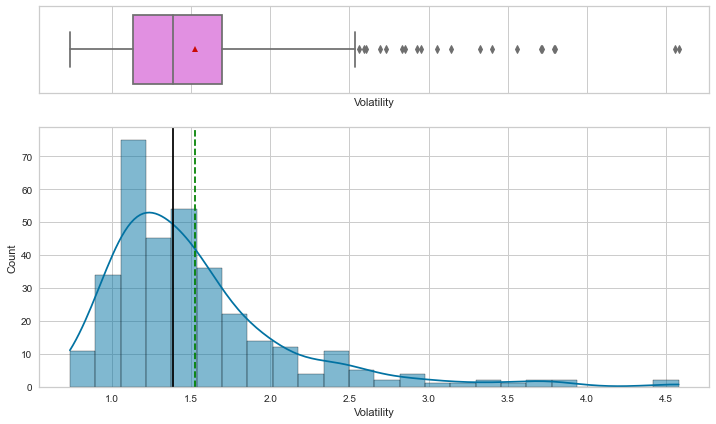

<IPython.core.display.Javascript object>

In [15]:
histo_box(df, "Volatility", kde=True)

- Volatility is right skewed which indicates the presence of outliers.

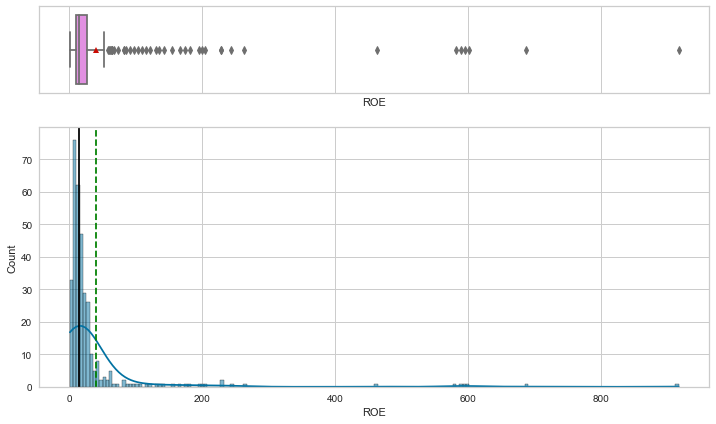

<IPython.core.display.Javascript object>

In [16]:
histo_box(df, "ROE", kde=True)

- ROE is heavily right skewed.
- ROE shows a great variance and values that can go from a minimum of 1 to a maximum of 917 which indicate outliers.

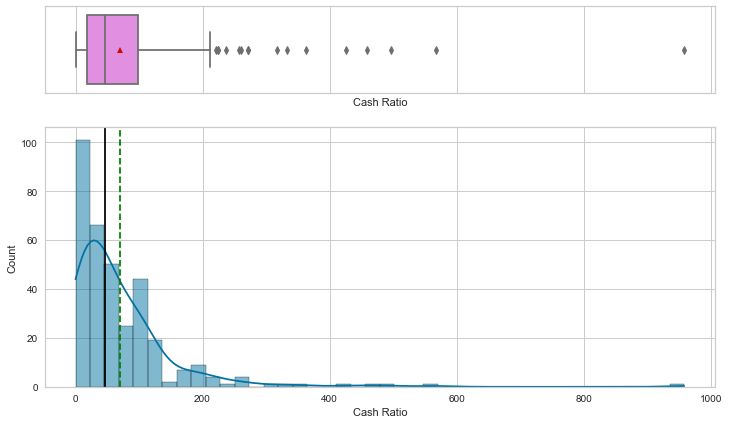

<IPython.core.display.Javascript object>

In [17]:
histo_box(df, "Cash Ratio", kde=True)

- Cash Ratio is also right skewed and coupled with the presence of outliers.

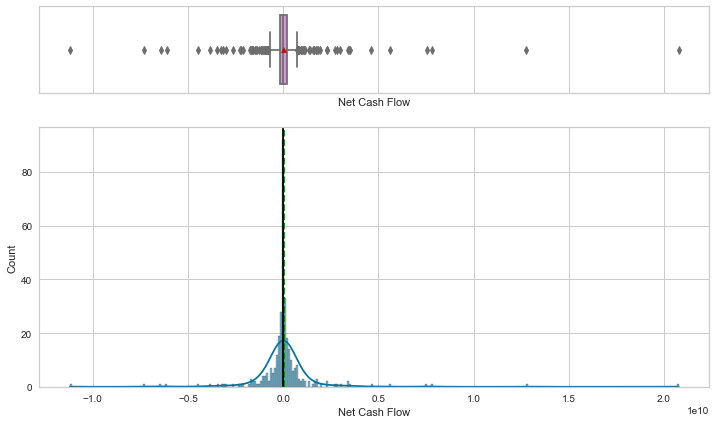

<IPython.core.display.Javascript object>

In [18]:
histo_box(df, "Net Cash Flow", kde=True)

- Net Cash Flow seems normally distributed with a mean equalling the median
- Few outliers can be noticed.

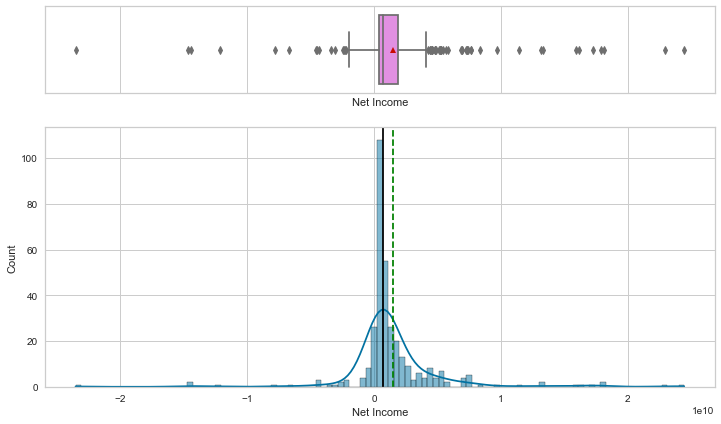

<IPython.core.display.Javascript object>

In [19]:
histo_box(df, "Net Income", kde=True)

- Net Income is slightly normally distributed with outliers on both tails.

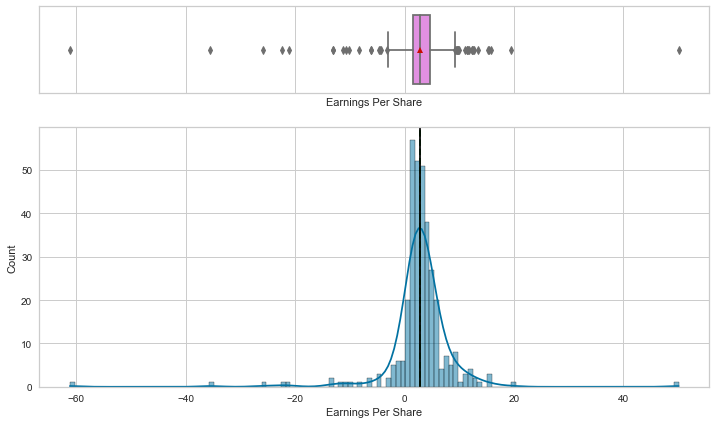

<IPython.core.display.Javascript object>

In [20]:
histo_box(df, "Earnings Per Share", kde=True)

- Earnings Per Share is normally distributed. The mean equals the median.

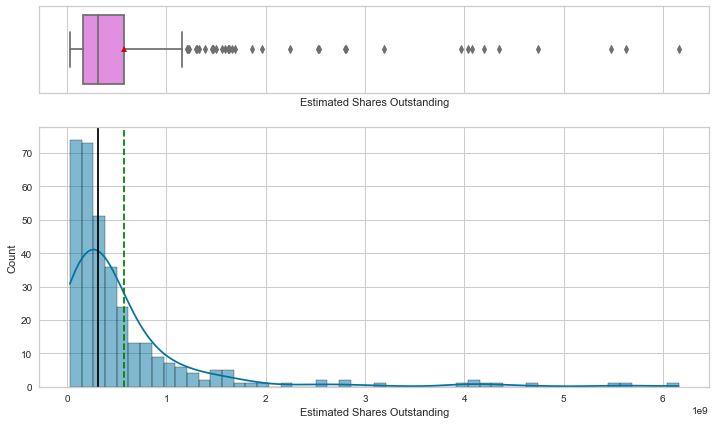

<IPython.core.display.Javascript object>

In [21]:
histo_box(df, "Estimated Shares Outstanding", kde=True)

- Estimated Shares Outstanding is heavily right skewed. Outliers are also present.

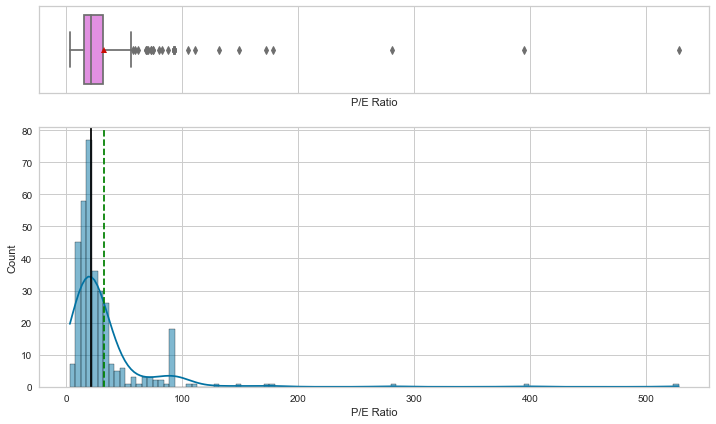

<IPython.core.display.Javascript object>

In [22]:
histo_box(df, "P/E Ratio", kde=True)

- P/E Ratio is heavily right skewed as well. Few outliers are present as well.

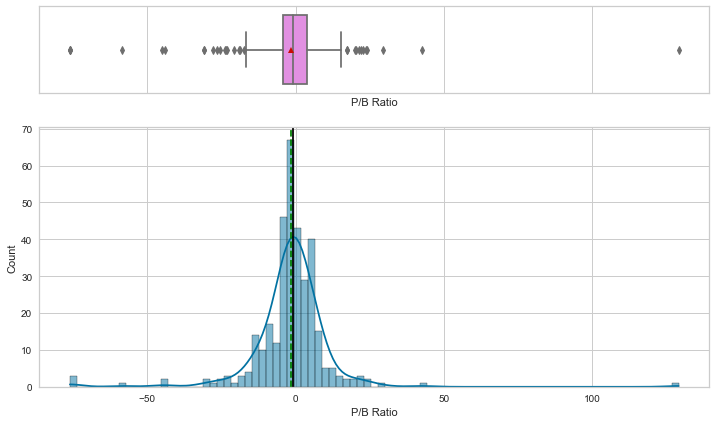

<IPython.core.display.Javascript object>

In [23]:
histo_box(df, "P/B Ratio", kde=True)

- P/B Ratio is normally distributed

#### Categorical Variables

In [24]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

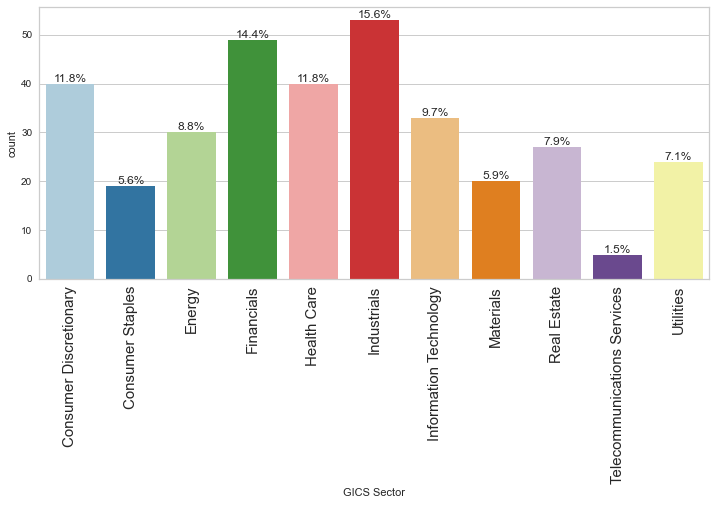

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(df, "GICS Sector", perc=True, n=None)

- Industrials, Financials, Consumer Discretionary and Health Care make up the highest number of stocks in the economic sector held by investors with respectively 15.6% , 14.4%, and 11.8% . They stand out among 11 sectors.

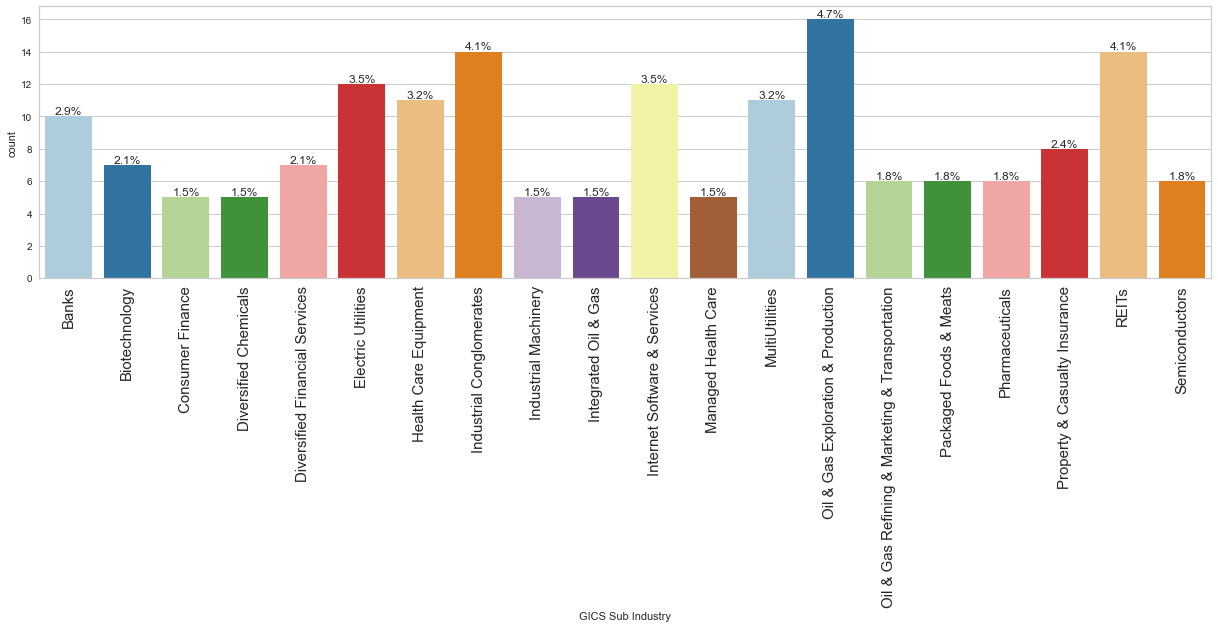

<IPython.core.display.Javascript object>

In [26]:
# showing the 20 GICS sub industries
labeled_barplot(df, "GICS Sub Industry", perc=True, n=20)

- GICS sub industry is classified into 104 industries.
- Further analysis will showcase the most performing ones.

#### Bivariate Analysis

#### The stocks of which economic sector have seen the maximum price increase on average?

In [27]:
sector_group = df.groupby("GICS Sector")["Price Change"].mean().reset_index()
sector_group

,GICS Sector,Price Change
0,Consumer Discretionary,5.846093
1,Consumer Staples,8.684750
2,Energy,-10.228289
3,Financials,3.865406
4,Health Care,9.585652
5,Industrials,2.833127
6,Information Technology,7.217476
7,Materials,5.589738
8,Real Estate,6.205548
9,Telecommunications Services,6.956980


<IPython.core.display.Javascript object>

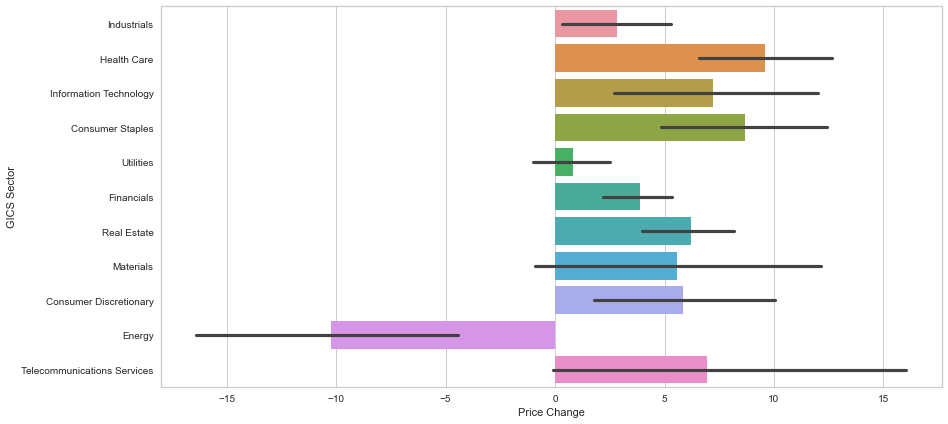

<IPython.core.display.Javascript object>

In [28]:
plt.figure(figsize=(14, 7))
sns.barplot(
    y="GICS Sector", x="Price Change", data=df,
)
plt.show()

- Health Care is the sector in which stocks have the hightest price change with 9.58%.
- The energy sector experiences the least change in price -10.22.

#### How are the different variables correlated with each other?

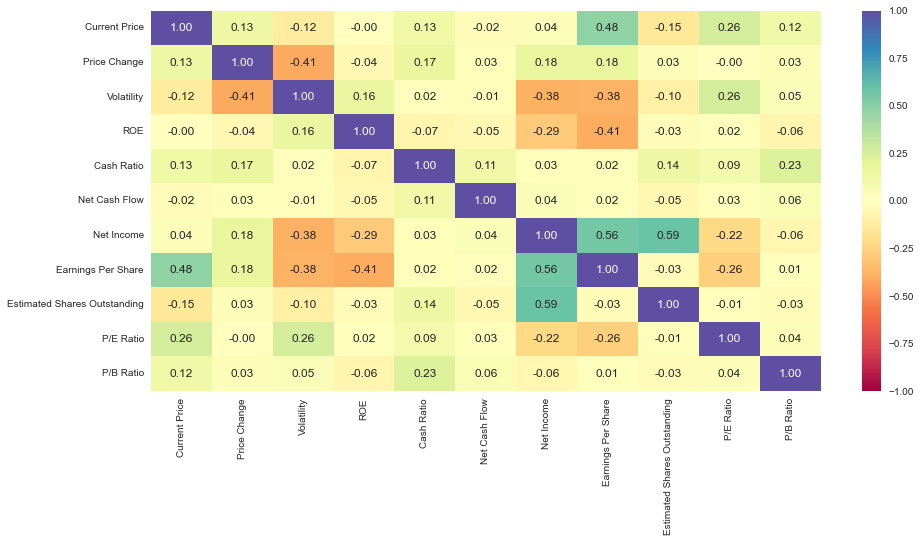

<IPython.core.display.Javascript object>

In [29]:
# Checking correlation between variables
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Net Income and Estimated Shares Outstanding are positively correlated 0.59.
- Net Income and Earnings Per Share are also positively correlated 0.58.
- Current Price and Earnings Per Share are slightly correlated 0.48.

#### Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

In [30]:
cashratio_ecosector = df.groupby("GICS Sector")["Cash Ratio"].mean().reset_index()
cashratio_ecosector

,GICS Sector,Cash Ratio
0,Consumer Discretionary,49.575000
1,Consumer Staples,70.947368
2,Energy,51.133333
3,Financials,98.591837
4,Health Care,103.775000
5,Industrials,36.188679
6,Information Technology,149.818182
7,Materials,41.700000
8,Real Estate,50.111111
9,Telecommunications Services,117.000000


<IPython.core.display.Javascript object>

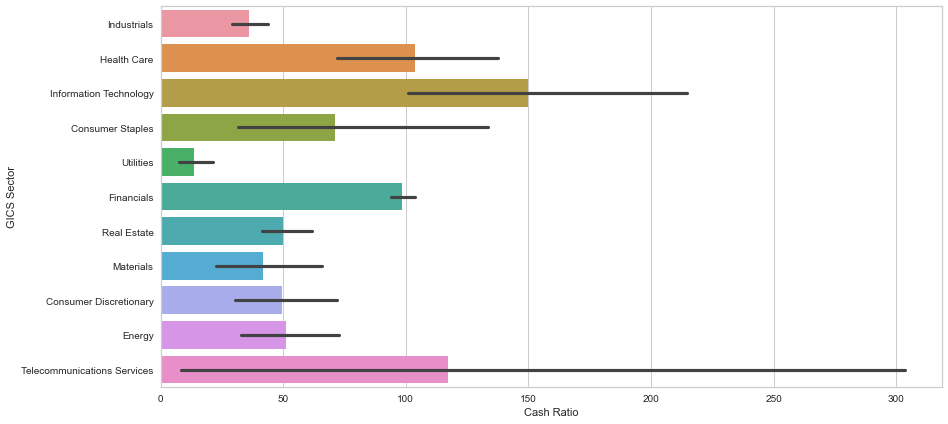

<IPython.core.display.Javascript object>

In [31]:
plt.figure(figsize=(14, 7))
sns.barplot(y="GICS Sector", x="Cash Ratio", data=df)
plt.show()

- The information technology sector covers better its short term obligations with cash and cash equivalents 149.81.
- The utilities sector shows some  bottlenecks in covering their short term obligations with cash.

#### P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [32]:
peratio_ecosector = df.groupby("GICS Sector")["P/E Ratio"].mean().reset_index()
peratio_ecosector

,GICS Sector,P/E Ratio
0,Consumer Discretionary,35.211613
1,Consumer Staples,25.521195
2,Energy,72.897709
3,Financials,16.023151
4,Health Care,41.135272
5,Industrials,18.259380
6,Information Technology,43.782546
7,Materials,24.585352
8,Real Estate,43.065585
9,Telecommunications Services,12.222578


<IPython.core.display.Javascript object>

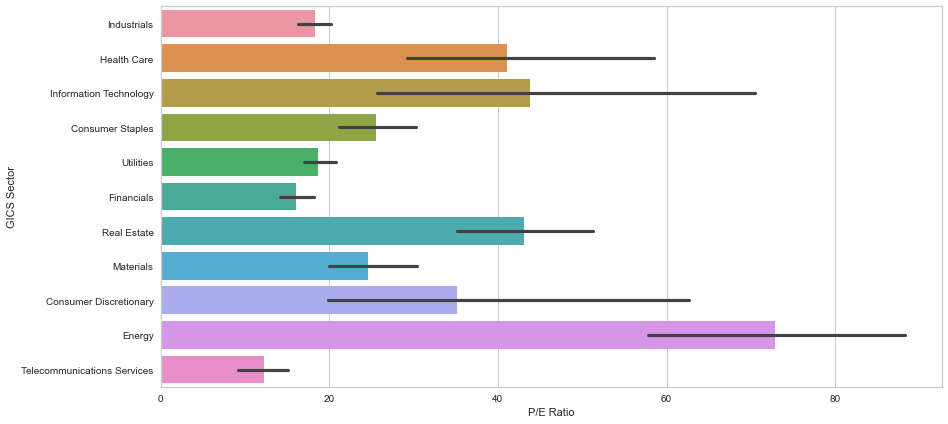

<IPython.core.display.Javascript object>

In [33]:
plt.figure(figsize=(14, 7))
sns.barplot(y="GICS Sector", x="P/E Ratio", data=df)
plt.show()

- The energy sector yields the highest P/E ratio. Investors are willing to ponny up 72 dollars for every dollar in earnings. Investors are ready to pay a higher share on the expectation of high growth and great earnings in the future.
- Information technology and Real Estate follow with respectively 43.78 and 43.05.


In [34]:
volatility_ecosector = df.groupby("GICS Sector")["Volatility"].mean().reset_index()
volatility_ecosector

,GICS Sector,Volatility
0,Consumer Discretionary,1.595478
1,Consumer Staples,1.152675
2,Energy,2.568777
3,Financials,1.267255
4,Health Care,1.541023
5,Industrials,1.416989
6,Information Technology,1.659801
7,Materials,1.816726
8,Real Estate,1.206053
9,Telecommunications Services,1.341612


<IPython.core.display.Javascript object>

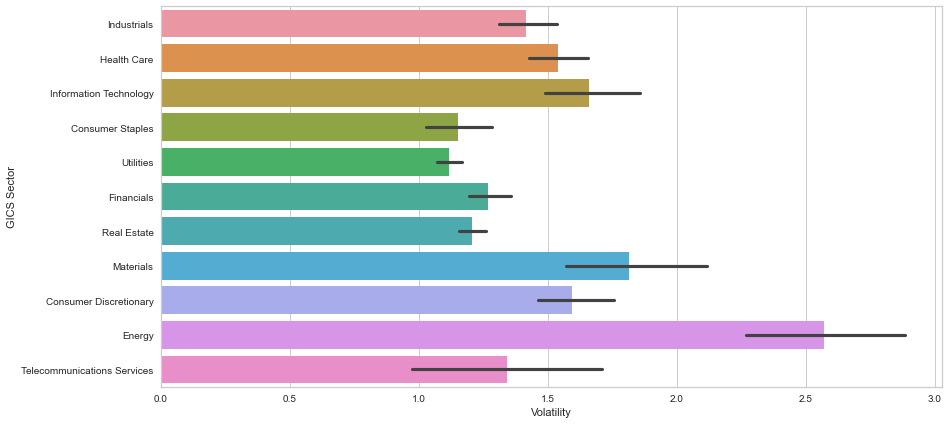

<IPython.core.display.Javascript object>

In [35]:
plt.figure(figsize=(14, 7))
sns.barplot(y="GICS Sector", x="Volatility", data=df)
plt.show()

- The energy sector is the most volatile sector with the highest standard deviations in their stock prices.
- Utilities sector is the least volatile sector with the lowest variations in their stock prices.

In [36]:
earningpershare_ecosector = (
    df.groupby("GICS Sector")["Earnings Per Share"].mean().reset_index()
)
earningpershare_ecosector

,GICS Sector,Earnings Per Share
0,Consumer Discretionary,4.525750
1,Consumer Staples,3.224211
2,Energy,-6.908333
3,Financials,4.220408
4,Health Care,4.541250
5,Industrials,4.456792
6,Information Technology,2.266061
7,Materials,3.129000
8,Real Estate,2.340000
9,Telecommunications Services,3.550000


<IPython.core.display.Javascript object>

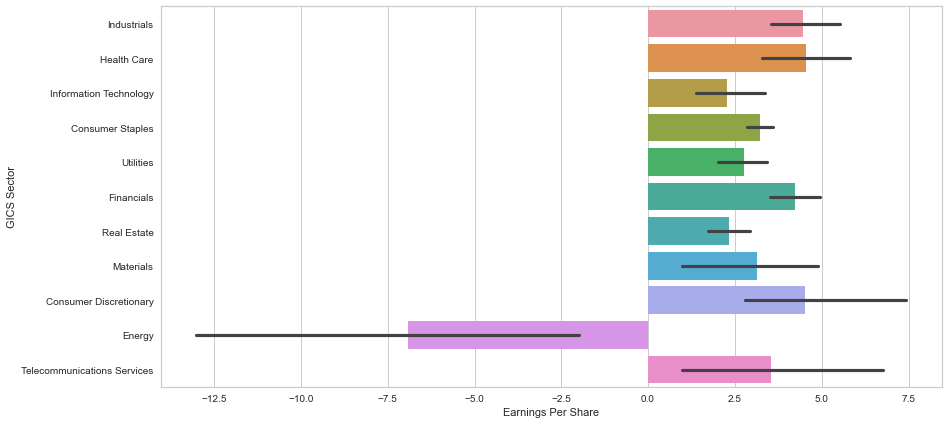

<IPython.core.display.Javascript object>

In [37]:
plt.figure(figsize=(14, 7))
sns.barplot(y="GICS Sector", x="Earnings Per Share", data=df)
plt.show()

- Earnings per share is high in the Health care sector followed by Consumer Discretionary.

#### EDA Insights:
- - Net Income and Estimated Shares showcase a positive correlation. As net income varies, estimated shares vary in the same direction. Likewise for Net Income and Earnings Per Share which are moderately correlated.
- The information technology sector covers better its short term obligations with cash and cash equivalents as opposed to the utilities sector that shows some difficulties in covering their obligations with cash.
- The energy sector exhibits a high interest from investors as it generates the highest P/E ratio. Information technology and Real Estate also show some high potential growth and a sizable return on investments.
- P/E ratio and volatility seem to move in the same direction. The higher P/E ratio, the higher the volatility. A positive slight correlation can be noticed for the energy sector.
- Utilities sector is the least volatile sector with the lowest variations in their stock prices.


## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

### Outliers Identification

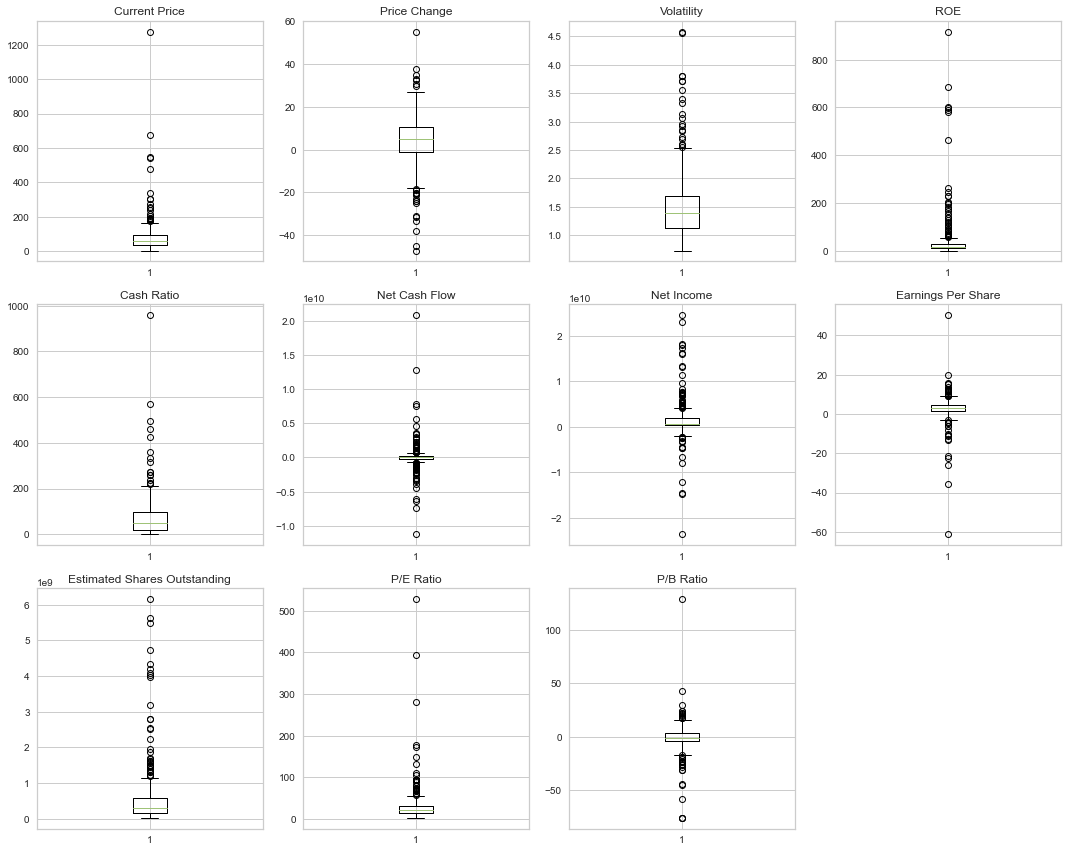

<IPython.core.display.Javascript object>

In [38]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Some data points appear as outliers, and Kmeans clustering is sensitive to outliers  
- Though the stock data seem valid as it pertains to the financial markets, outlier treatement will be applied to obtain quality solutions. For instance, the highest current stock price is the one for priceline 1274 dollars; Amazon also has a high stock price. They seem normal in this industry, especially at the whee hours of the internet buble. For the sake of the analysis we will treat them.


In [39]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
   Treats outliers in a variable

   df: dataframe
   col: dataframe column
   """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # All the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker- Flooring
    # All the values greater than Upper_Whisker will be assigned the value of Upper_Whisker- Capping

    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
   Treat outliers in a list of variables

   df: dataframe
   col_list: list of dataframe columns
   """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [40]:
# Defining the outliers columns list to be treated
treat_out_cols = [item for item in data.select_dtypes(include=np.number).columns]

# Applying the treatment function by passing the dataframe and the outliers list
df2 = treat_outliers_all(data, treat_out_cols)

<IPython.core.display.Javascript object>

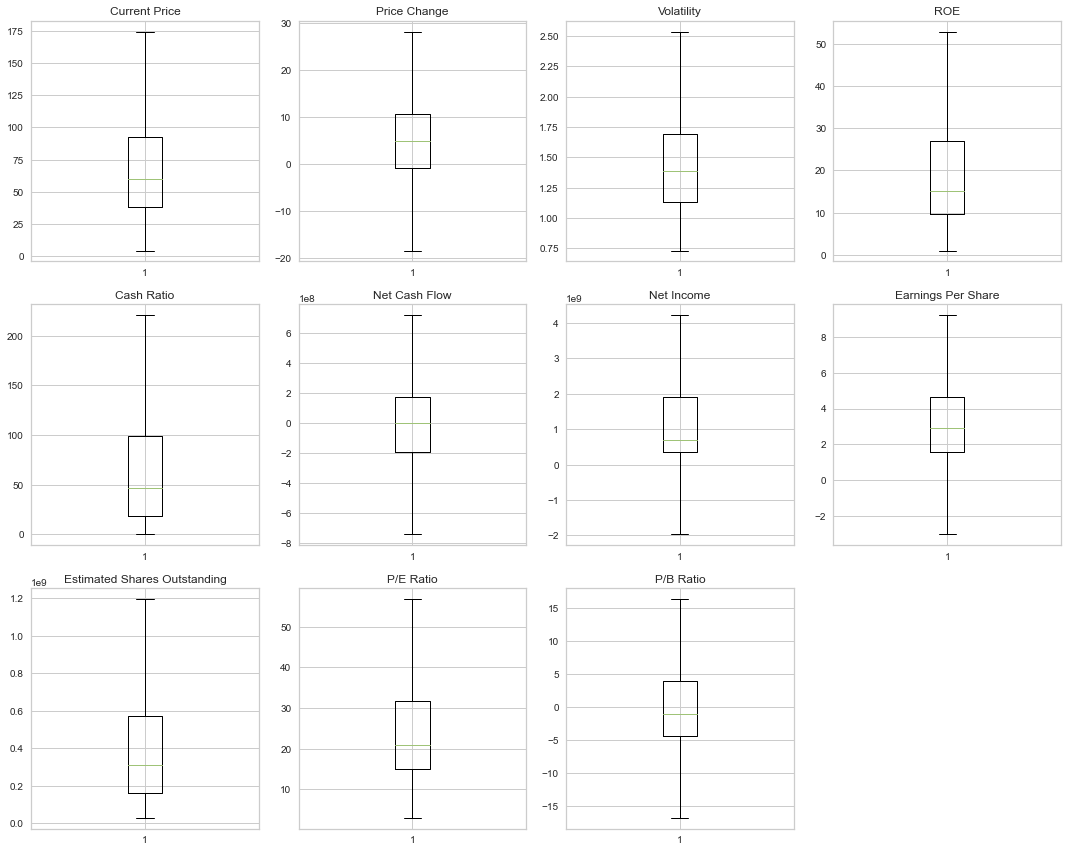

<IPython.core.display.Javascript object>

In [41]:
# Plotting the variables after outlier treatement
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## KMeans

### Scaling  Data for KMeans and Hierachical Clustering Algorithms Computation

In [42]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df2[numeric_columns].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [43]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

In [44]:
# Copying the subset scaled dataframe
k_means_df = subset_scaled_df.copy()

<IPython.core.display.Javascript object>

Number of Clusters: 1 	Average Distortion: 3.1482665386211908
Number of Clusters: 2 	Average Distortion: 2.9507542400143842
Number of Clusters: 3 	Average Distortion: 2.759761533270845
Number of Clusters: 4 	Average Distortion: 2.63153843620545
Number of Clusters: 5 	Average Distortion: 2.5345886566890665
Number of Clusters: 6 	Average Distortion: 2.4703313338147543
Number of Clusters: 7 	Average Distortion: 2.3892036349104346
Number of Clusters: 8 	Average Distortion: 2.3415378767145505
Number of Clusters: 9 	Average Distortion: 2.302109092619317
Number of Clusters: 10 	Average Distortion: 2.2377809582576833
Number of Clusters: 11 	Average Distortion: 2.204551626221652
Number of Clusters: 12 	Average Distortion: 2.183120889408329
Number of Clusters: 13 	Average Distortion: 2.136519876101571
Number of Clusters: 14 	Average Distortion: 2.1093177250276294


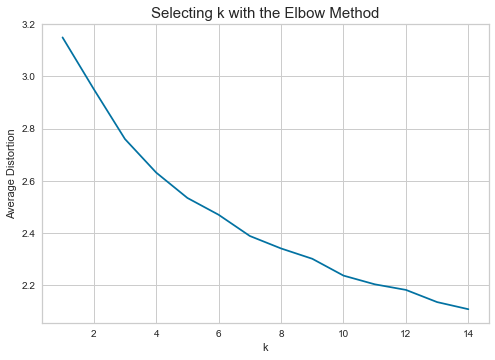

<IPython.core.display.Javascript object>

In [45]:
# Calculating the average distortion and the number of clusters
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=15)
plt.show()

- The appropriate values for k seem to be 2, 4 and 6.
- Slight elbows are visible at these values.

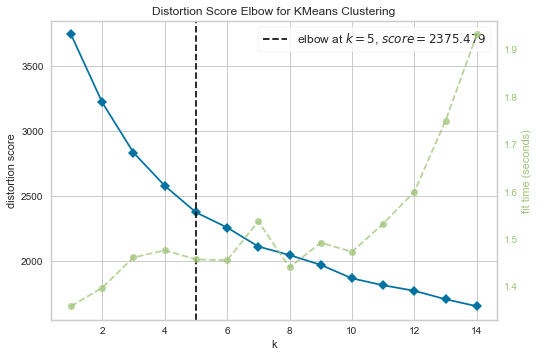

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

<IPython.core.display.Javascript object>

In [46]:
# Let's fit the KMeans model for a range of K values from 1 to 15 to help select the optimal number of clusters
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
# Fitting the data to the visualizer
visualizer.fit(k_means_df)
# Visualizing the data
visualizer.show()

- The elbow visualizer method shows 5 as the optimal value. Let's confirm it with the silhouette scores.

**Let's check the silhouette scores.**

For n_clusters = 2, the silhouette score is 0.14040363305436732)
For n_clusters = 3, the silhouette score is 0.1818864171381463)
For n_clusters = 4, the silhouette score is 0.1653160289647168)
For n_clusters = 5, the silhouette score is 0.14591373480130365)
For n_clusters = 6, the silhouette score is 0.14123009384579105)
For n_clusters = 7, the silhouette score is 0.1371811289782077)
For n_clusters = 8, the silhouette score is 0.13111986503005277)
For n_clusters = 9, the silhouette score is 0.12839314434358204)
For n_clusters = 10, the silhouette score is 0.1393666960963218)
For n_clusters = 11, the silhouette score is 0.135393326699983)
For n_clusters = 12, the silhouette score is 0.13543944176814168)
For n_clusters = 13, the silhouette score is 0.13808929034629017)
For n_clusters = 14, the silhouette score is 0.12467396300203645)


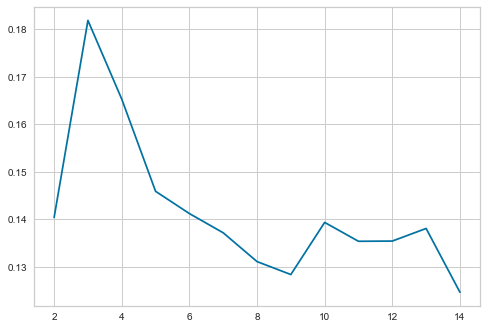

<IPython.core.display.Javascript object>

In [47]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

**From the silhouette scores, it seems that 3 is a good value of k.**

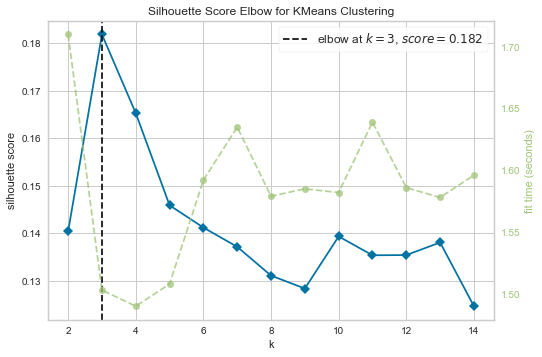

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

<IPython.core.display.Javascript object>

In [48]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**From the kelbow visualizer, 3 seems to be a good value as well**

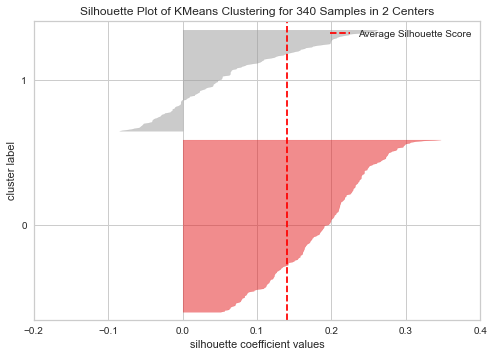

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [49]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

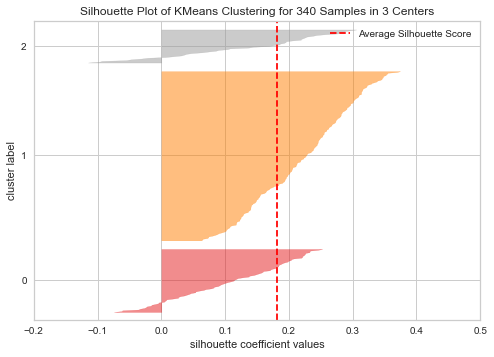

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [50]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

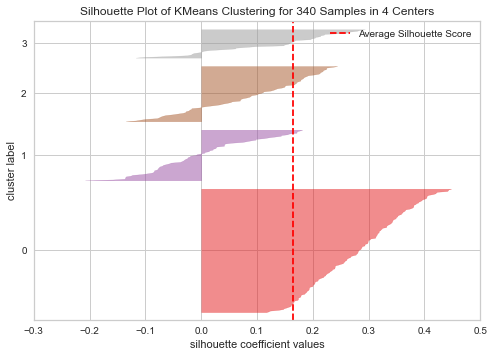

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [51]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

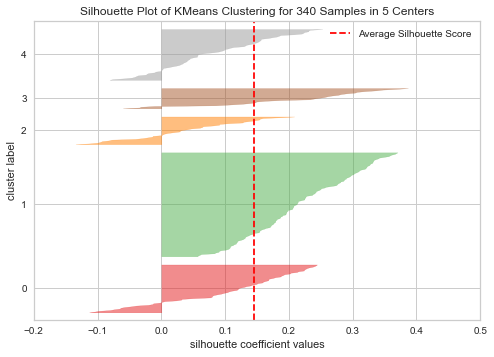

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [52]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

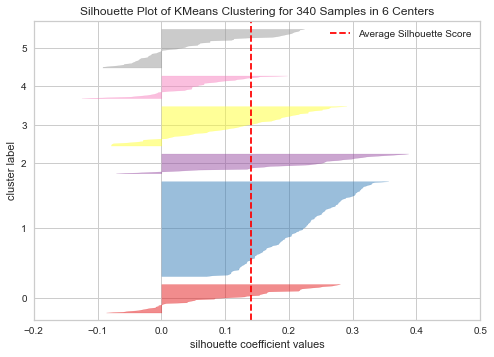

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [53]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

- 5 seems to be a good value but we will go with 6 as the silhouette score is high enough and a knee can be spotted on the elbow plot. 
- The silhouette coefficients for the six clusters are greater than the average silhouette cluster. 
- The silhouette visualizer shows well spread clusters which may infer a better distribution of companies.

In [54]:
# Initializing the number of clusters to 6
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(k_means_df)

KMeans(n_clusters=6, random_state=0)

<IPython.core.display.Javascript object>

In [55]:
# Copying the original data
df1 = df.copy()

# Adding kmeans cluster labels to the original and scaled dataframes
# scaled data
k_means_df["K_means_segments"] = kmeans.labels_
# original data
df1["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

### Cluster Profiles

In [56]:
# Grouping clusters by label
km_cluster_profile = df1.groupby(
    "K_means_segments"
).mean()  ## Complete the code to groupby the cluster labe

<IPython.core.display.Javascript object>

In [57]:
# Grouping cluster labels by company and adding a new column for their count
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("K_means_segments")["Security"].count().values
)

<IPython.core.display.Javascript object>

In [58]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,143.353809,10.784934,1.754361,27.400000,243.085714,572852371.428571,639227457.142857,2.922286,512357057.214286,75.444353,8.599688,35
1,51.637612,3.817945,1.381319,24.611511,43.856115,-5485057.553957,636002115.107914,2.372698,281080752.933309,23.744217,-3.500825,139
2,160.922203,5.408495,1.322512,55.694915,39.440678,-69649627.118644,1227549322.033898,7.036441,191628023.559322,25.474747,-5.707790,59
3,60.933429,8.083426,1.342802,34.228571,75.971429,2275437142.857143,5325197142.857142,4.827429,1368761988.165714,16.771349,-1.868824,35
4,32.952294,-14.961397,2.834190,96.966667,47.933333,-216786366.666667,-3455053333.333333,-8.436333,571912105.234667,74.438688,1.590948,30
5,63.869928,7.743801,1.318429,40.238095,66.190476,-1653142857.142857,5765661904.761905,4.308571,1495638739.126191,19.621551,-1.050931,42


<IPython.core.display.Javascript object>

In [59]:
# Printing the companies in each cluster
for cl in df1["K_means_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["K_means_segments"] == cl]["Security"].unique())
    print()

In cluster 5, the following companies are present:
['American Airlines Group' 'AFLAC Inc'
 'American International Group, Inc.' 'Activision Blizzard'
 'Boeing Company' 'Baxter International Inc.'
 'The Bank of New York Mellon Corp.' 'Bristol-Myers Squibb'
 'Citigroup Inc.' 'Caterpillar Inc.' 'Colgate-Palmolive' 'CSX Corp.'
 'CVS Health' 'Chevron Corp.' 'Delta Air Lines' 'Du Pont (E.I.)'
 'Danaher Corp.' 'Duke Energy' 'eBay Inc.' 'Corning Inc.' 'General Motors'
 "Honeywell Int'l Inc." 'International Business Machines'
 'Illinois Tool Works' 'JPMorgan Chase & Co.' 'Coca Cola Company'
 'Lilly (Eli) & Co.' 'LyondellBasell' 'Marsh & McLennan'
 'Altria Group Inc' 'Marathon Petroleum' 'PNC Financial Services'
 'Phillips 66' 'PayPal' 'SunTrust Banks' 'State Street Corp.' 'AT&T Inc'
 'Texas Instruments' 'Union Pacific' 'Verizon Communications'
 'Wells Fargo' 'Exxon Mobil Corp.']

In cluster 3, the following companies are present:
['AbbVie' 'Abbott Laboratories' 'Applied Materials Inc'
 'America

<IPython.core.display.Javascript object>

In [60]:
# Count of companies by GICS sector
df1.groupby(["K_means_segments", "GICS Sector"])["Security"].count()

K_means_segments  GICS Sector                
0                 Consumer Discretionary          4
                  Consumer Staples                2
                  Energy                          1
                  Financials                      1
                  Health Care                    10
                  Information Technology         12
                  Materials                       3
                  Real Estate                     1
                  Telecommunications Services     1
1                 Consumer Discretionary         21
                  Consumer Staples                7
                  Financials                     22
                  Health Care                    10
                  Industrials                    26
                  Information Technology          7
                  Materials                       6
                  Real Estate                    19
                  Telecommunications Services     1
                  

<IPython.core.display.Javascript object>

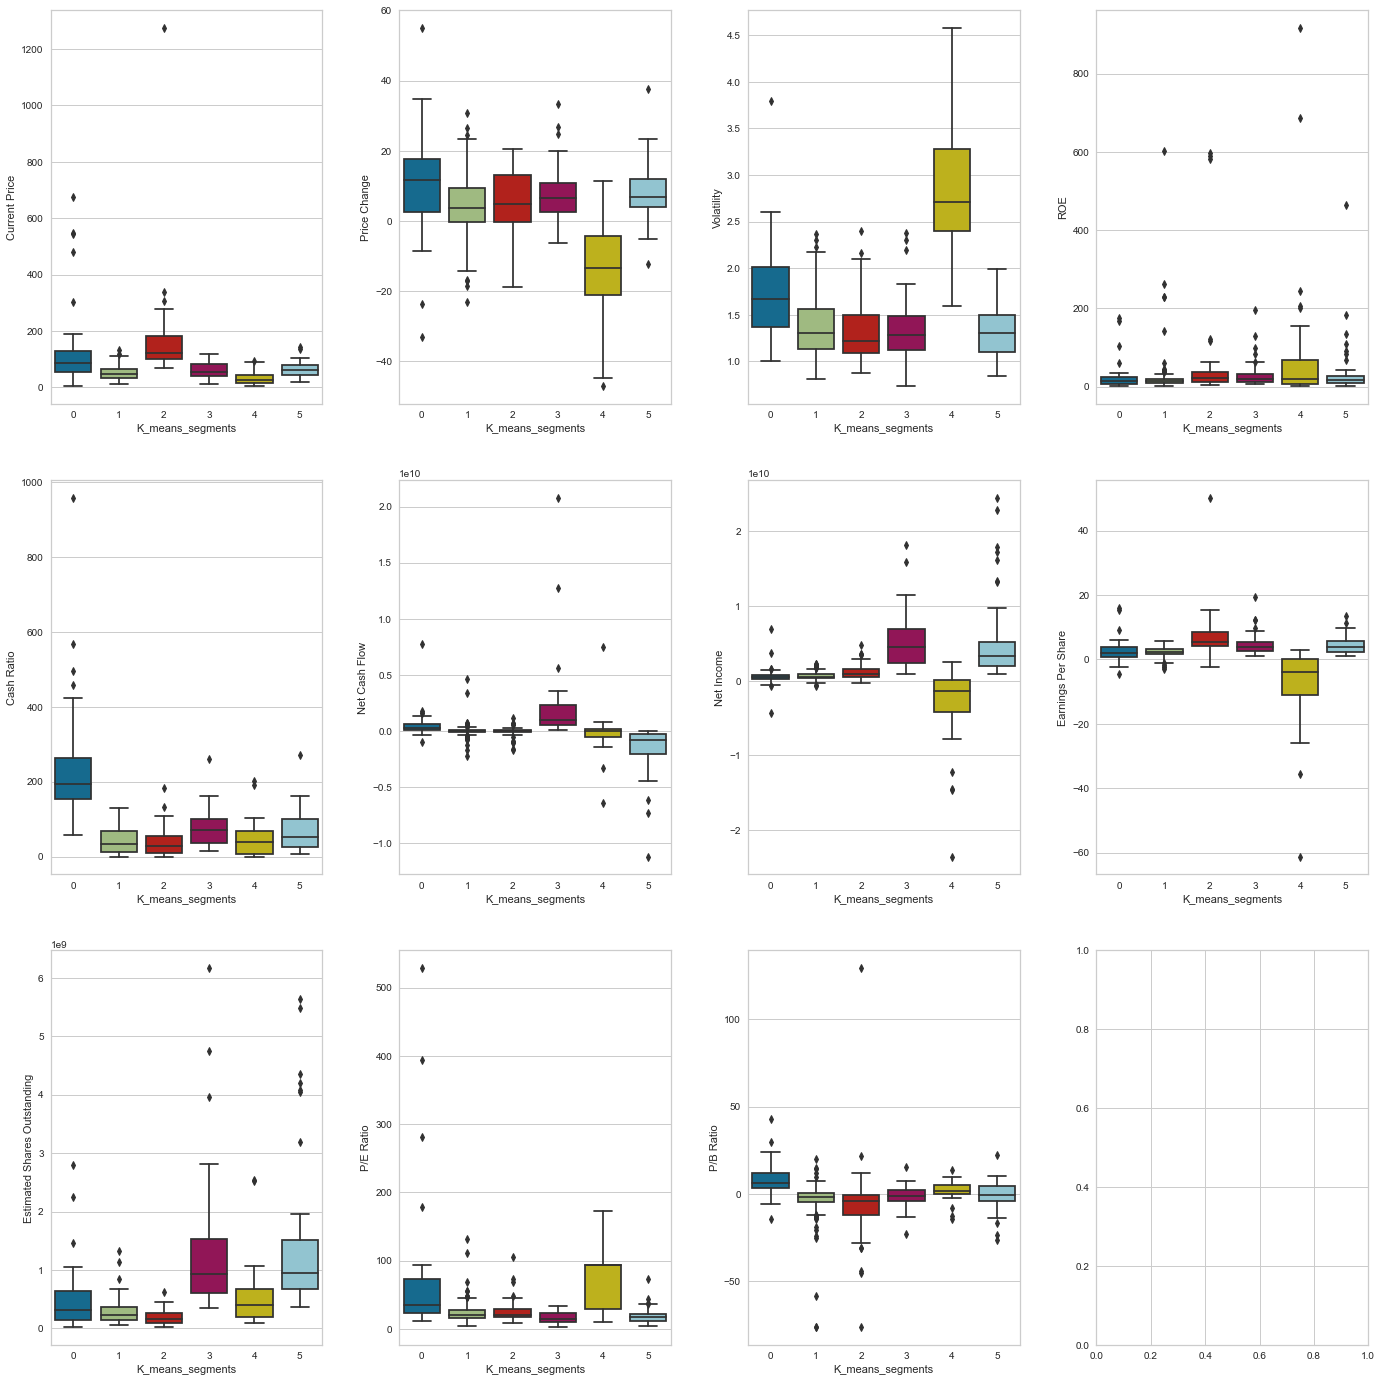

<IPython.core.display.Javascript object>

In [61]:
# Plotting boxplots for the variables by segment
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df1,
                y=df1.columns[4 + counter],
                x="K_means_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

### Insights

**Cluster0**
 - 35 companies form this cluster. 
 - Cluster houses companies with the highest P/E ratio and cash ratio. Investors pay 75 dollars for every dollar of earnings.
 - Information technology and health care make up the bulk of the companies.
 - P/B ratio is also the highest which means that companies'stocks in this cluster are overvalued. A market correction may bring down the share values and make them more affordable However, there is a caveat as not all companies operate in the same sector.
 
**Cluster1**
  - There are 139 companies.
  - The analysis of the data shows moderate values for most of the ratios.
  - Negative cash flows tarnish the seemingly safe companies within the cluster.
  
**Cluster2**
  - There are 59 companies
  - Earnings per share and current price are the highest in this cluster in average.
  - Companies in this cluster seem profitable as a share can return up to 7 dollars.
  
**Cluster 3**
 - There are 35 companies
 - Cluster regroups companies with sizable cash flows that enable them to maintain operations in the short and medium terms.
 - The negative P/B ratio might suggest undervalued share prices.
 
**Cluster 4**
 - There are 30 companies.
 - ROE and volatility are the highest in this cluster. Share prices tend to fluctuate very widely and negatively.
 - Net income and net cash flow stand in the red zone which may indicate poor management
 
**Cluster 5**
 - There are 42 companies.
 - Net income as well as estimated share outstanding are the highest.
 - Net cash flow and P/B ratio are negative.
 - Negative P/B ratio could indicate an undervalued stock.

## Hierarchical Clustering

In [62]:
# Let's create another copy of the scaled dataframe
df_hclus = subset_scaled_df.copy()

<IPython.core.display.Javascript object>

In [63]:
# Listing distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"] 

# Listing linkage methods
linkage_methods = ["single", "complete", "average", "weighted"] 

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(df_hclus, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(df_hclus))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm


Cophenetic correlation for Euclidean distance and single linkage is 0.6932108674136777.
Cophenetic correlation for Euclidean distance and complete linkage is 0.6147798823663769.
Cophenetic correlation for Euclidean distance and average linkage is 0.7325610568988987.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.6496438783746494.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7214024727237498.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.36805931247944257.
Cophenetic correlation for Chebyshev distance and average linkage is 0.7011385715318806.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.5032471223561586.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.6176064847170997.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.3854304450443972.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.6415876007925733.
Cophenetic c

<IPython.core.display.Javascript object>

In [64]:
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.7325610568988987, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**

**Let's see the dendrograms for the different linkage methods.**

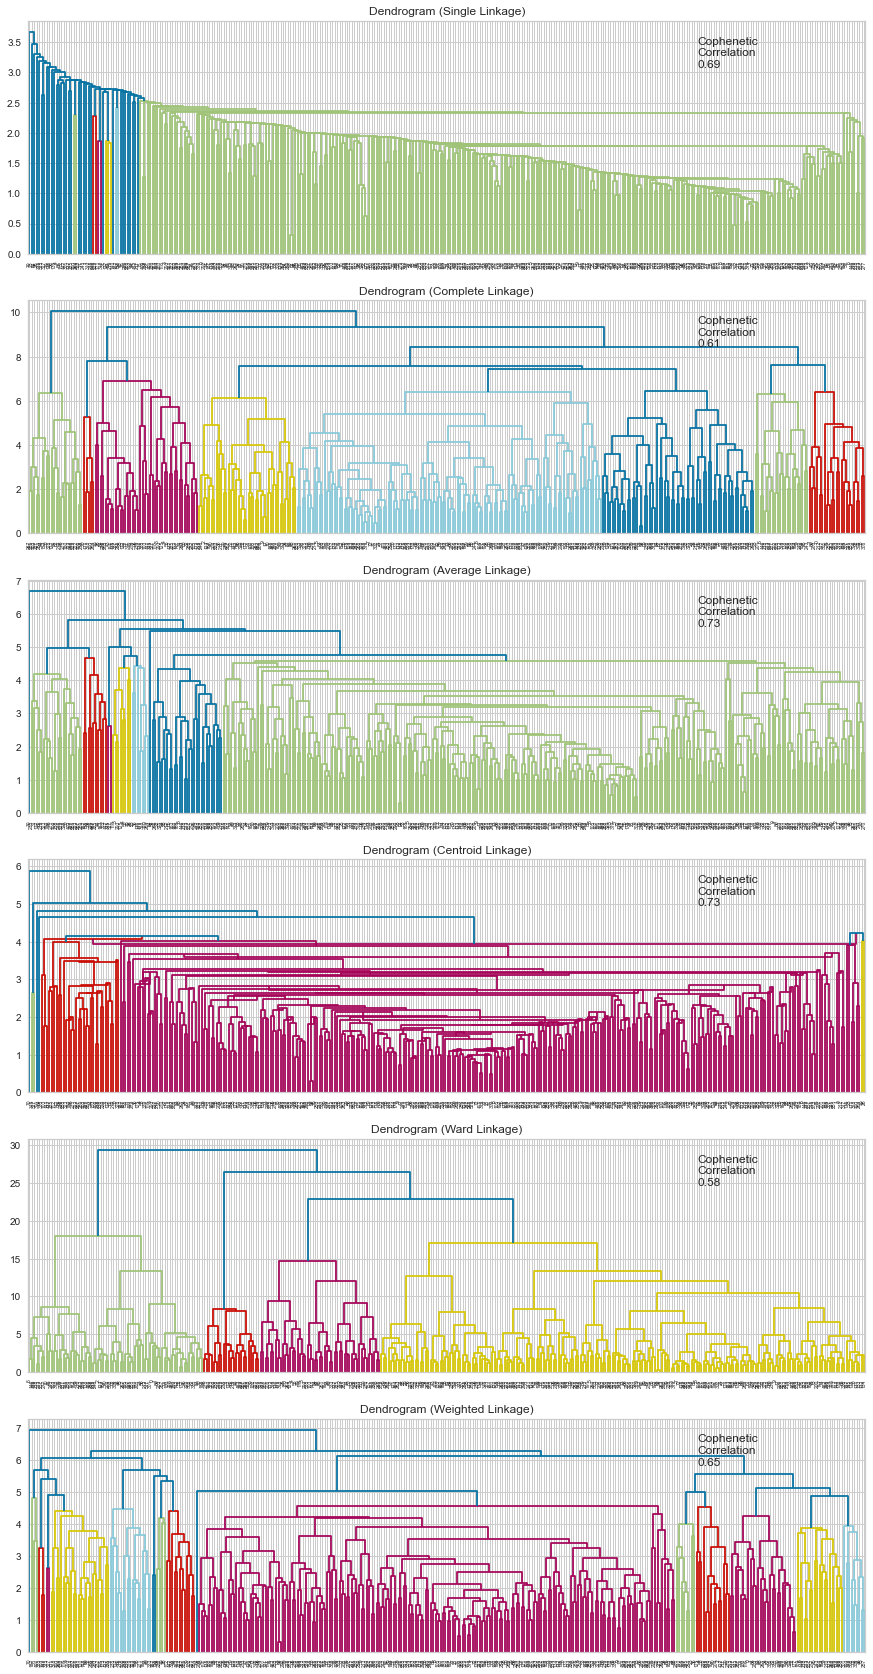

<IPython.core.display.Javascript object>

In [65]:
# Listing linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# Creating a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation

for i, method in enumerate(linkage_methods):
    Z = linkage(df_hclus, metric="euclidean", method=method)
    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(df_hclus))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [66]:
# Creating and printing a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.575331
1,complete,0.614780
5,weighted,0.649644
0,single,0.693211
3,centroid,0.729433
2,average,0.732561


<IPython.core.display.Javascript object>

**Observations**

- The cophenetic correlation is highest for average and centroid linkage methods.
- We will select average linkage.
- 6 appears to be the appropriate number of clusters from the dendrogram for average linkage.

In [67]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="average")
HCmodel.fit(df_hclus)

AgglomerativeClustering(linkage='average', n_clusters=6)

<IPython.core.display.Javascript object>

In [68]:
# Creating a copy of the original data for hierachical clustering
df3 = df.copy()

# Adding hierarchical cluster labels to the original and scaled dataframes

# scaled dataframe
df_hclus["HC_segments"] = HCmodel.labels_

# original dataframe
df3["HC_segments"] = HCmodel.labels_

<IPython.core.display.Javascript object>

### Cluster Profile

In [69]:
# Grouping clusters by label
hc_cluster_profile = df3.groupby("HC_segments").mean()

<IPython.core.display.Javascript object>

In [70]:
# Grouping cluster labels by company and adding a new column for their count
hc_cluster_profile["count_in_each_segment"] = (
    df3.groupby("HC_segments")["Security"].count().values
)

<IPython.core.display.Javascript object>

In [71]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,35.513226,-12.989098,2.792332,93.838710,72.483871,208844354.838710,-3263876870.967742,-8.256129,515969783.843226,86.815801,2.197868,31
1,76.656163,5.102466,1.372084,32.713793,57.551724,25204131.034483,2036779162.068965,3.891569,586720480.908034,23.052649,-2.693662,290
2,220.268666,19.176050,1.596141,14.866667,281.000000,352096266.666667,1250762200.000000,3.930667,637400038.950667,105.605205,11.499047,15
3,479.850006,-33.131268,2.474002,22.000000,237.000000,-171460000.000000,475602000.000000,15.300000,31085098.040000,31.362745,17.201329,1
4,183.100006,3.598507,1.697942,589.000000,0.000000,2000000.000000,-271000000.000000,-2.430000,111522633.700000,20.819876,-76.119077,1
5,97.510002,25.712421,3.125659,116.500000,209.500000,-6283000.000000,-180522000.000000,-0.190000,171011878.950000,37.726335,7.627691,2


<IPython.core.display.Javascript object>

In [72]:
# Printing the companies in each cluster
for cl in df3["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df3[df3["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 1, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Archer-Daniels-Midland Co' 'Alliance Data Systems' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball Corp' 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Citigroup Inc.' 'Caterpi

<IPython.core.display.Javascript object>

In [73]:
# Grouping and counting labels by GICS sector
df3.groupby(["HC_segments", "GICS Sector"])["Security"].count()

HC_segments  GICS Sector                
0            Energy                         24
             Information Technology          4
             Materials                       2
             Telecommunications Services     1
1            Consumer Discretionary         35
             Consumer Staples               19
             Energy                          6
             Financials                     49
             Health Care                    32
             Industrials                    53
             Information Technology         24
             Materials                      18
             Real Estate                    26
             Telecommunications Services     4
             Utilities                      24
2            Consumer Discretionary          2
             Health Care                     7
             Information Technology          5
             Real Estate                     1
3            Consumer Discretionary          1
4            Consum

<IPython.core.display.Javascript object>

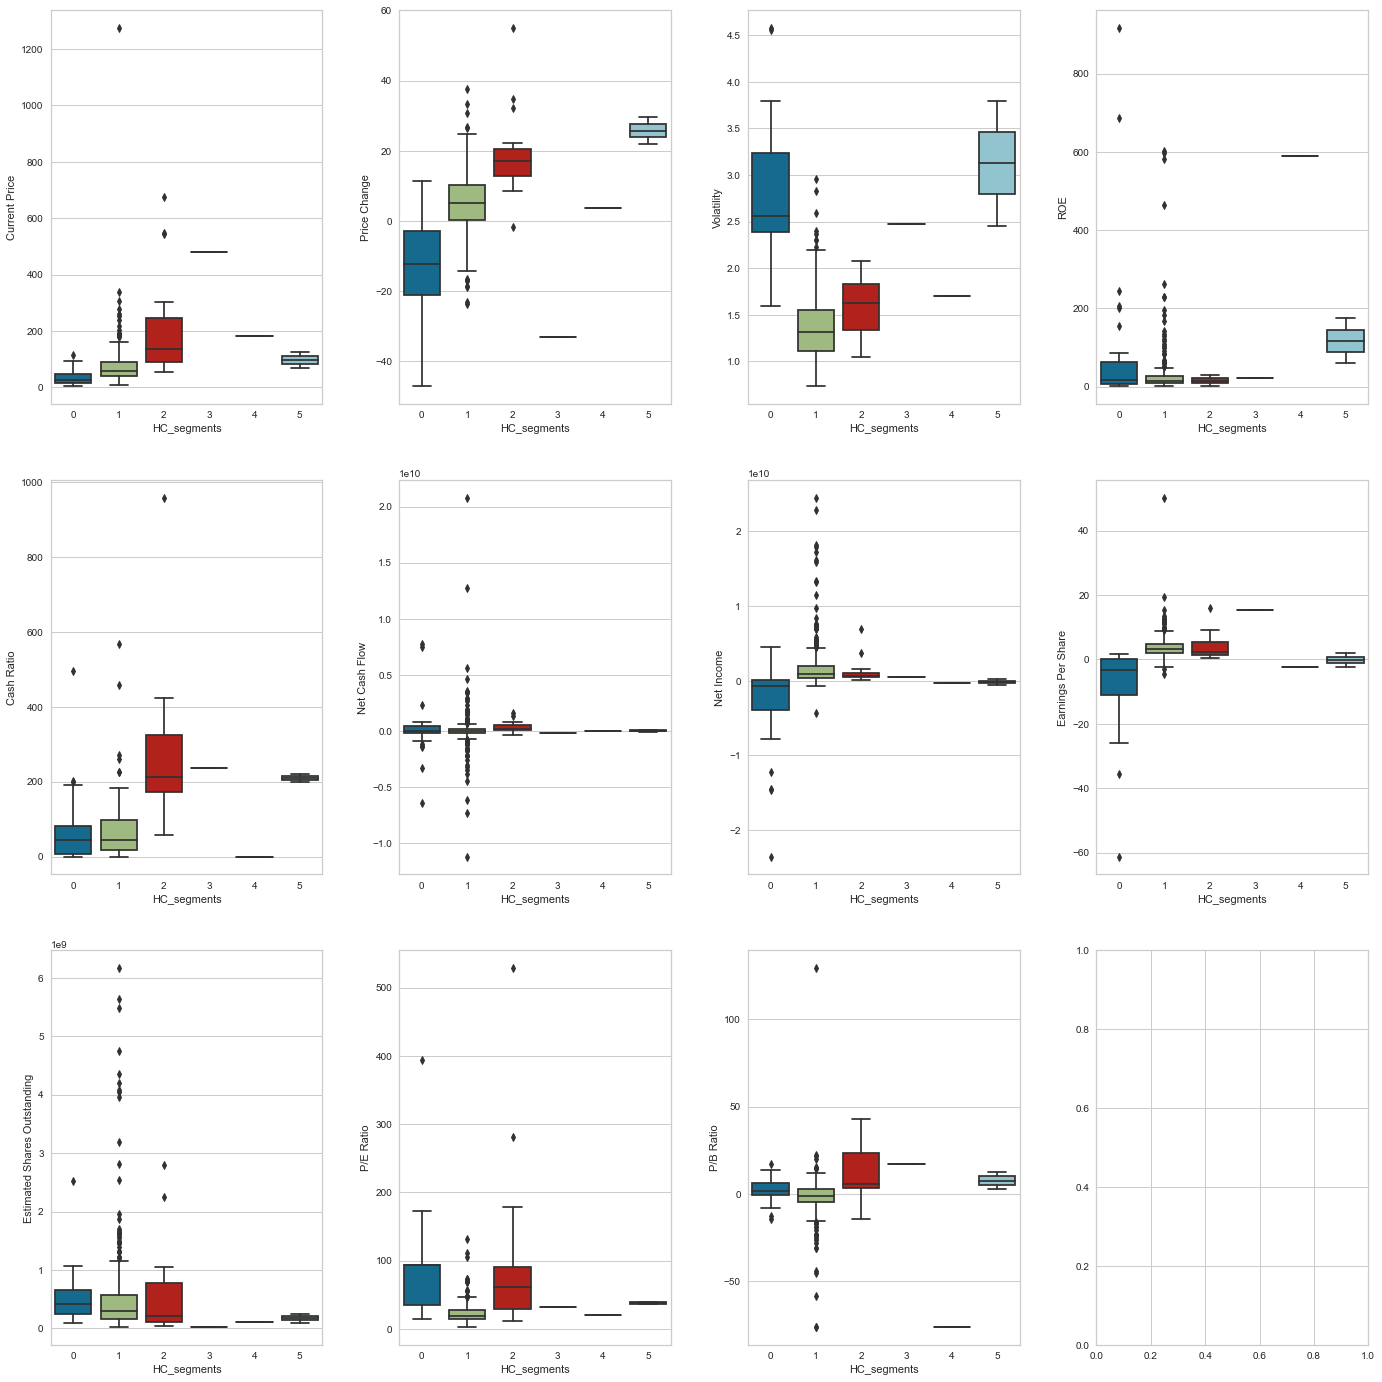

<IPython.core.display.Javascript object>

In [74]:
# Plotting boxplots
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj], data=df3, y=df3.columns[4 + counter], x="HC_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

## Insights

We will review clusters 0, 1, and 2 since the other clusters have only 1 or 2 companies in them.

- **Cluster 0**
   - There are 31 companies in this cluster.
   - The average current stock price for the companies in this sector is low and affordable to investors.
   - ROE and P/E ratios are high enough and rewarding for investors that deem investments.
   - Cash ratio, net cash flow , estimated shares outstanding  and volatility are moderate.
   - Price change, net income and earnings per share exhibit negative values.
   - The bulk of these companies in this group belongs to the energy sector that requires heavy investments with a long 
     payback period. This may explain the negative income and earnings per share.
 
- **Cluster 1**
   - There are 294 companies in this cluster.
   - This cluster yields the highest net income. Companies that make up this cluster come from the Industrials, financials and consumer discretionary sectors. 
   - P/E ratio and cash ratio are medium average that can lure conservative investors who are averse to risk.
   
   
- **Cluster 2**
   - There are 15 companies in this cluster.
   - Companies in this cluster produce the highest P/E ratio and cash ratio.
   - Companies in this cluster are very liquid and have a high net cash flow.
   - Healthcare and information technology sector make up the bulk of the companies.
   - The majority of shares hold by sharehoulders resides in this cluster.



## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

## Actionable Insights and Recommendations

- 

- KMeans seems to consume less time for execution as opposed to hierachical clustering. Dendograms can take a longer time to display if the data is sizable. This constitues a good argurment to leverage KMeans for large datasets.
- Dendograms deliver more distinct clusters than KMeans. Determining K, oftentimes, can follow a trial and error path when there is no need to do so in hierachical clustering. Observing the dendogram can lead us to figure out the number of clusters assuming that the data size is manageable.
- KMeans provides a more balanced clustering in terms of observations's grouping with: 
  - cluster 0:35
  - cluster 1:139
  - cluster 2:59
  - cluster 3:35
  - cluster 4:30
  - cluster 5:42
- compared to hierachical clustering
  - cluster 0:31
  - cluster 1:290
  - cluster 2:15
  - cluster 3:1
  - cluster 4:1
  - cluster 5:2
- Leveraging the elbow method and validating k with the silhouette score, the Kelbow visualizer and the silhouette visualizer help determine the optimal value of k. 6 appear as the optimal number of clusters to produce quality and optimal results.

### Recommendations:

- A thorough analysis of the stock data leads us to recommend cluster 0 with KMeans that houses 35 companies in the information technnology and health care sectors. They produce good ratios that are enticing for investors.For instance,the information technology sector covers better its short term obligations with cash and cash equivalents- cash ratio: 149.81.
- On the other hand, we recommend cluster 2 with hierachical clustering. 15 companies form this cluster with 7 in heath care and 5 in information technology.
- Information technology and health care stock appear to be the most rewarding sectors where investors can look into for higher returns on their investments.